In [2]:
from torchvision.transforms import v2
from torchvision.io import read_image
import matplotlib.pyplot as plt
from viact.helpers import plot
import cv2 
import numpy as np

%matplotlib inline


image_path = "./image/three_ships_horizon.JPG"
image = cv2.imread(image_path)
image.shape


(1200, 1600, 3)

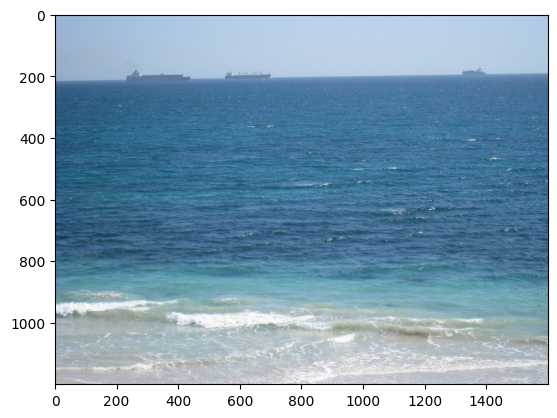

In [3]:
def cv2_imshow(cv2image):
    plt.imshow(cv2.cvtColor(cv2image, cv2.COLOR_BGR2RGB))
    plt.show()

cv2_imshow(image)


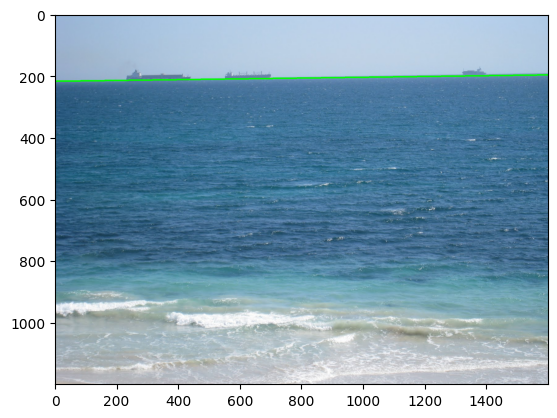

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

line = lines[0]
rho, theta = line[0][0], line[0][1]
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
x0 = cos_theta * rho
y0 = sin_theta * rho
x1 = int(x0 + image.shape[1] * (-sin_theta))
y1 = int(y0 + image.shape[0] * (cos_theta))
x2 = int(x0 - image.shape[1] * (-sin_theta))
y2 = int(y0 - image.shape[0] * (cos_theta))

cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

cv2_imshow(image)

In [5]:
x0, y0, x1, y1, x2, y2, cos_theta, sin_theta, theta

(3.8046196, 217.9668, -1595, 238, 1603, 197, 0.017452383, 0.9998477, 1.553343)

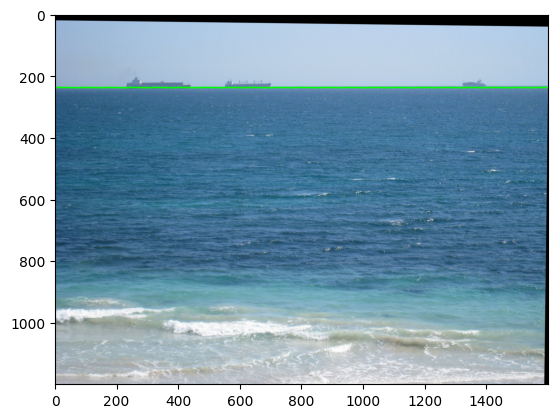

In [16]:
level_angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
rotate_matrix = cv2.getRotationMatrix2D((x1,y1), angle=level_angle, scale=1) 
rotated_image = cv2.warpAffine( 
    src=image, M=rotate_matrix, dsize=(image.shape[1], image.shape[0])) 
cv2_imshow(rotated_image)

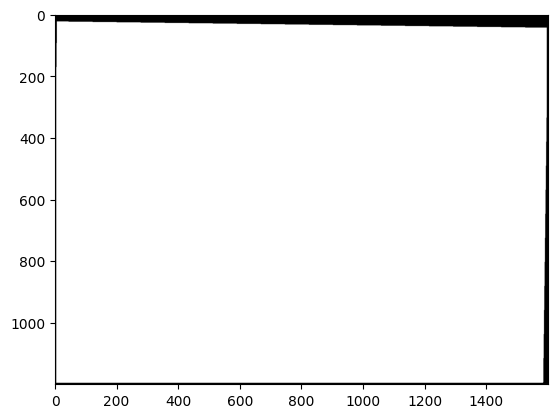

In [17]:
grayscale = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)
ret, thresholded = cv2.threshold(grayscale, 0, 255, 0)

bbox = cv2.boundingRect(thresholded)
x, y, w, h = bbox
contours, hier= cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


for k, _ in enumerate(contours):
    im = cv2.cvtColor(cv2.drawContours(thresholded, contours, k, (0, 0, 255), 6),cv2.COLOR_BGR2RGB)

plt.imshow(im)


In [18]:
x, y = contours[0].T[0][0], contours[0].T[1][0]
x, y

(array([   2,    2,    1,    1,    0,    0, 1587, 1587, 1588, 1588, 1589,
        1589, 1590, 1590, 1591, 1591, 1592, 1592, 1593, 1593, 1594, 1594,
        1595, 1595, 1596, 1596, 1597, 1597, 1598, 1598, 1599, 1599, 1526,
        1525, 1448, 1447, 1370, 1369, 1292, 1291, 1214, 1213, 1136, 1135,
        1058, 1057,  980,  979,  902,  901,  824,  823,  746,  745,  668,
         667,  590,  589,  512,  511,  434,  433,  356,  355,  278,  277,
         200,  199,  122,  121,   44,   43], dtype=int32),
 array([  20,   93,   94,  171,  172, 1199, 1199, 1194, 1193, 1116, 1115,
        1038, 1037,  960,  959,  882,  881,  804,  803,  726,  725,  648,
         647,  570,  569,  492,  491,  414,  413,  336,  335,   40,   40,
          39,   39,   38,   38,   37,   37,   36,   36,   35,   35,   34,
          34,   33,   33,   32,   32,   31,   31,   30,   30,   29,   29,
          28,   28,   27,   27,   26,   26,   25,   25,   24,   24,   23,
          23,   22,   22,   21,   21,   20], dtype=in

In [19]:
def find_contours_boundary(x,y): 
    x_max_arg = len(x)-np.argmax(x[::-1])-1
    return y[x_max_arg]

In [20]:
y_at_x_max = find_contours_boundary(x, y)
x_at_y_max = find_contours_boundary(y, x)
cropped = rotated_image[y_at_x_max:y_at_x_max+h, :x_at_y_max]


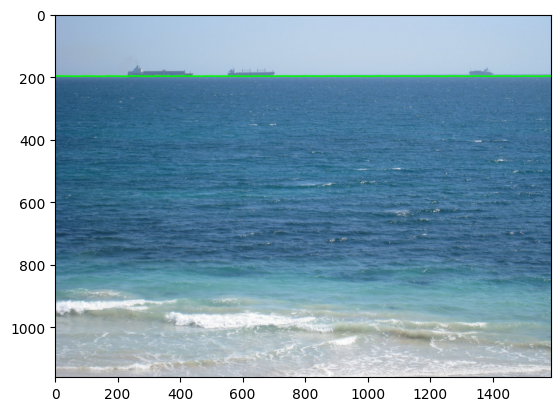

In [21]:
cv2_imshow(cropped)

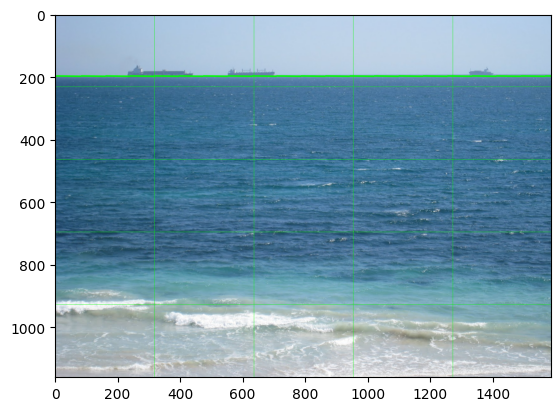

In [22]:
import cv2 as cv  
import numpy as np

# view grid to check level
def draw_grid(img, grid_shape, color=(0, 255, 0), thickness=1):
    h, w, _ = img.shape
    rows, cols = grid_shape
    dy, dx = h / rows, w / cols

    # draw vertical lines
    for x in np.linspace(start=dx, stop=w-dx, num=cols-1):
        x = int(round(x))
        cv.line(img, (x, 0), (x, h), color=color, thickness=thickness)

    # draw horizontal lines
    for y in np.linspace(start=dy, stop=h-dy, num=rows-1):
        y = int(round(y))
        cv.line(img, (0, y), (w, y), color=color, thickness=thickness)

    return img

cropped = draw_grid(cropped, (5,5))
cv2_imshow(cropped)